# Projeto Final de Machine Learning
Feito por: _Henrique Bucci_ e _Marcelo Alonso_

Dados e informações: https://www.kaggle.com/datasets/marcopale/housing/data

## Parte 0

Utilizar LASSO para seleção de features.

Regressão linear para ignorar outliers.

RANSAC -> regressao linear que ignora outliers

**Perguntas**  
Posso remover o PID?  
Quais as melhores formas de selecionar features?  
Posso criar colunas a partir de contas de outras antes de fazer a seleção?
Se eu aplicar PolynomialFeatures nos dados, eles também contam como features para a contagem?  
Posso utilizar correlação na análise exploratória?  
Posso fazer correlação entre o target e as features durante a análise?

### Bibliotecas

In [1]:
import pandas as pd
from utils import *


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Constantes

In [2]:
SEED = 420

### Carregamento e Pré-processamento dos Dados

In [3]:
dataset = load_data()
dataset.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
"""
Como a primeira coluna é o ID da observação, podemos removê-la, uma vez que estes são valores arbitrários.
"""
dataset = dataset.iloc[:, 1:] # Estamos removendo as duas primeiras colunas, que são o ID e o PID (Parcel identification number)

### Train-Test Split

In [8]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Parte 1

### Análise Exploratória

Nesta parte, iremos fazer uma análise global dos dados, apenas para garantir a integridade destes.  
Assim sendo, iremos procurar entender quais são as features e target, quais são seus respectivos tipos e buscar outras informações como:
- Dados nulos
- Dados duplicados
- Outliers
- Spikes
- Erros grosseiros

Além disso, iremos buscar saber a distribuição e a "cara" de cada variável.

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS.SubClass      2930 non-null   int64  
 2   MS.Zoning        2930 non-null   object 
 3   Lot.Frontage     2440 non-null   float64
 4   Lot.Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot.Shape        2930 non-null   object 
 8   Land.Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot.Config       2930 non-null   object 
 11  Land.Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition.1      2930 non-null   object 
 14  Condition.2      2930 non-null   object 
 15  Bldg.Type        2930 non-null   object 
 16  House.Style      2930 non-null   object 
 17  Overall.Qual  

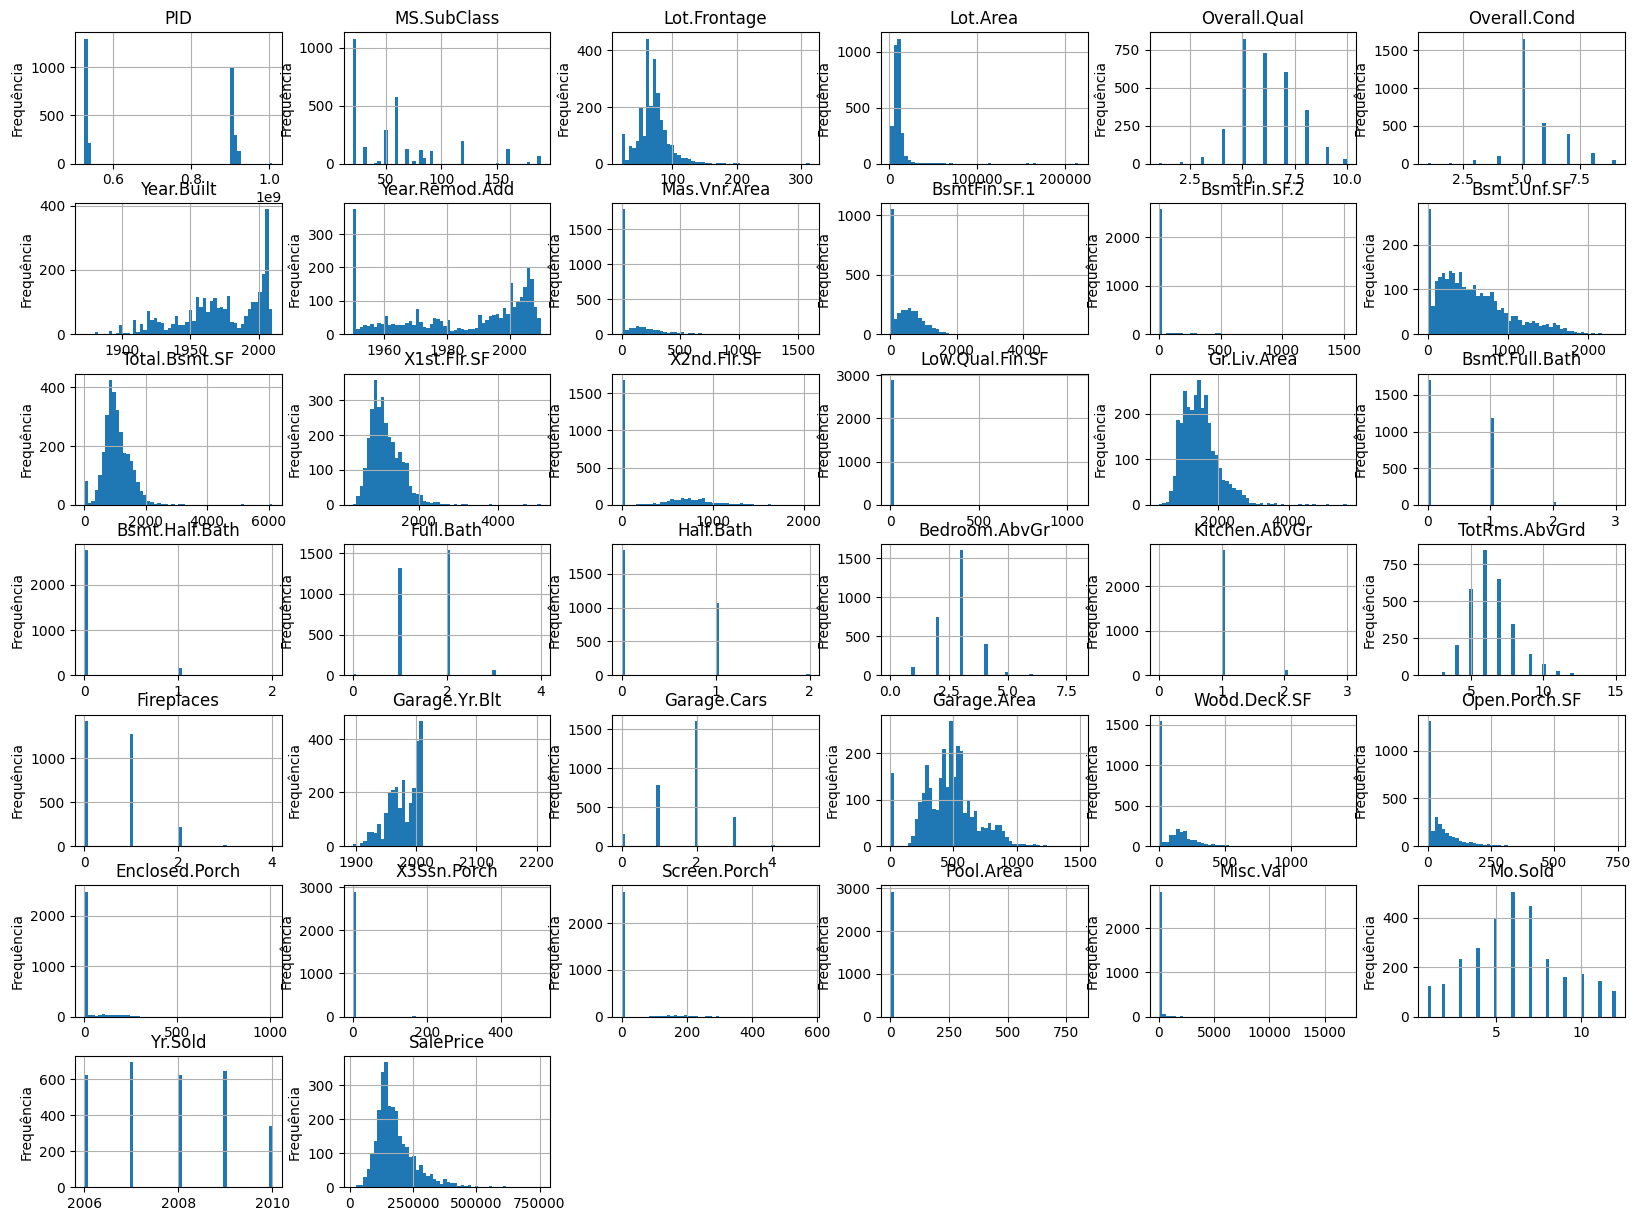

In [11]:
n_bins = np.floor(np.sqrt(dataset.shape[0])).astype(int).item()

result = dataset \
    .select_dtypes(include='number') \
    .hist(bins=n_bins, figsize=(20, 15))

for subplot in result.flatten():
    column = subplot.get_title()
    if not column:
        continue
    subplot.set_ylabel('Frequência')

plt.show()

## Parte 5

Seleção de modelos com GridSearchCV

In [ ]:
param_grid = [{
    'regressor' : [LinearRegression(), DummyRegressor()],
}, {
    'regressor': [Lasso(), Ridge()],
    'alpha': [0.1, 1, 10, 100],
}, {
    'regressor': [ElasticNet()],
    'alpha': [0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9]
}, {
    'regressor': [RandomForestRegressor()],
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}, {
    'regressor': [GradientBoostingRegressor()],
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}]